In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 400)

In [321]:
df=pd.read_excel(r'C:\Users\Katia Suely\Desktop\Planilhas do lavat\dados 12 2016.xlsx')


In [322]:
df=df[['Dia','Mes','Ano','Hora','SolarRad','Rain','TempOut']]


In [323]:
df['DateTime']=df.Dia.apply(str)+'/'+df.Mes.apply(str)+'/'+df.Ano.apply(str)+'--'+df.Hora.apply(str)
df.DateTime=pd.to_datetime(df.DateTime, format='%d/%m/%y--%H:%M:%S')
df.drop(['Dia','Mes','Ano','Hora'], axis=1,inplace=True)


In [324]:
Compare=[]
for j in range(1,32):
    y=0
    x=0
    for i in range(144):
        if x==60:
            x=0
            y=y+1
        Compare.append('2016-{}-12 {}:{}:00'.format(j,y,x))
        x=x+10
Compare=pd.to_datetime(Compare, format='%Y-%d-%m %H:%M:%S')
#Compare=pd.DataFrame(Compare)
#Compare.columns=['Compare']


In [325]:

filt=[]
for i in range(len(df.DateTime)):
    filt.append((df.loc[i,'DateTime'] in Compare)) 

df=df.loc[filt]



In [326]:
df.set_index(df.DateTime, inplace=True)
df



,SolarRad,Rain,TempOut,DateTime
DateTime,,,,
2016-12-01 00:00:00,0,0.0,26200,2016-12-01 00:00:00
2016-12-01 00:10:00,0,0.0,26200,2016-12-01 00:10:00
2016-12-01 00:20:00,0,0.0,26200,2016-12-01 00:20:00
2016-12-01 00:30:00,0,0.0,26200,2016-12-01 00:30:00
2016-12-01 00:40:00,0,0.0,26200,2016-12-01 00:40:00
...,...,...,...,...
2016-12-31 23:10:00,0,0.0,26800,2016-12-31 23:10:00
2016-12-31 23:20:00,0,0.0,26700,2016-12-31 23:20:00
2016-12-31 23:30:00,0,0.0,26800,2016-12-31 23:30:00


In [327]:
filt2=[]
for i in range(len(Compare)):
    filt2.append(Compare[i] not in df.DateTime)
filt2

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [328]:
HrsFaltantes=Compare[filt2]

In [329]:
HrsFaltantes

DatetimeIndex(['2016-12-04 05:10:00', '2016-12-04 05:20:00',
               '2016-12-04 05:30:00', '2016-12-04 05:40:00',
               '2016-12-04 05:50:00', '2016-12-05 23:10:00',
               '2016-12-05 23:30:00', '2016-12-05 23:40:00',
               '2016-12-06 01:00:00', '2016-12-06 02:30:00',
               '2016-12-06 02:50:00', '2016-12-06 04:20:00',
               '2016-12-06 04:40:00', '2016-12-06 04:50:00',
               '2016-12-06 05:00:00', '2016-12-07 05:20:00',
               '2016-12-10 01:40:00', '2016-12-10 02:00:00',
               '2016-12-13 19:50:00', '2016-12-13 20:10:00',
               '2016-12-20 00:20:00', '2016-12-20 04:30:00',
               '2016-12-20 05:40:00', '2016-12-21 00:00:00',
               '2016-12-21 01:30:00', '2016-12-21 02:10:00',
               '2016-12-21 19:50:00', '2016-12-21 20:00:00',
               '2016-12-21 21:20:00', '2016-12-21 21:50:00',
               '2016-12-21 23:20:00', '2016-12-21 23:30:00',
               '2016-12-

In [330]:
Faltantes=pd.DataFrame(np.ones((len(HrsFaltantes),3))*(-1))

In [331]:
Faltantes.set_index(HrsFaltantes, inplace=True)

In [332]:
Faltantes

,0,1,2
2016-12-04 05:10:00,-1.0,-1.0,-1.0
2016-12-04 05:20:00,-1.0,-1.0,-1.0
2016-12-04 05:30:00,-1.0,-1.0,-1.0
2016-12-04 05:40:00,-1.0,-1.0,-1.0
2016-12-04 05:50:00,-1.0,-1.0,-1.0
2016-12-05 23:10:00,-1.0,-1.0,-1.0
2016-12-05 23:30:00,-1.0,-1.0,-1.0
2016-12-05 23:40:00,-1.0,-1.0,-1.0
2016-12-06 01:00:00,-1.0,-1.0,-1.0
2016-12-06 02:30:00,-1.0,-1.0,-1.0


In [333]:
df.drop('DateTime',axis=1, inplace=True)

In [334]:
Faltantes.columns=['Rain','SolarRad','TempOut']

In [335]:
df=df.append(Faltantes)

In [336]:
df=df.sort_index()


In [337]:
df

,SolarRad,Rain,TempOut
2016-12-01 00:00:00,0.0,0.0,26200.0
2016-12-01 00:10:00,0.0,0.0,26200.0
2016-12-01 00:20:00,0.0,0.0,26200.0
2016-12-01 00:30:00,0.0,0.0,26200.0
2016-12-01 00:40:00,0.0,0.0,26200.0
...,...,...,...
2016-12-31 23:10:00,0.0,0.0,26800.0
2016-12-31 23:20:00,0.0,0.0,26700.0
2016-12-31 23:30:00,0.0,0.0,26800.0
2016-12-31 23:40:00,0.0,0.0,26800.0


In [338]:
df.replace(-1,np.nan,inplace=True)

In [339]:
#df.loc['2014-01-07':'2014-01-09']

In [340]:
ag=['Lavat']*len(df.index)
df['FilledData']=ag

In [341]:
df.loc[HrsFaltantes,'FilledData']='Faltante'

In [342]:
df.head(320)

,SolarRad,Rain,TempOut,FilledData
2016-12-01 00:00:00,0.0,0.0,26200.0,Lavat
2016-12-01 00:10:00,0.0,0.0,26200.0,Lavat
2016-12-01 00:20:00,0.0,0.0,26200.0,Lavat
2016-12-01 00:30:00,0.0,0.0,26200.0,Lavat
2016-12-01 00:40:00,0.0,0.0,26200.0,Lavat
2016-12-01 00:50:00,0.0,0.0,26300.0,Lavat
2016-12-01 01:00:00,0.0,0.0,26300.0,Lavat
2016-12-01 01:10:00,0.0,0.0,26300.0,Lavat
2016-12-01 01:20:00,0.0,0.0,26400.0,Lavat
2016-12-01 01:30:00,0.0,0.0,26300.0,Lavat


In [343]:
#df['SolarRad'].replace('PREENCHER',-100,inplace=True)
#df.head(320)

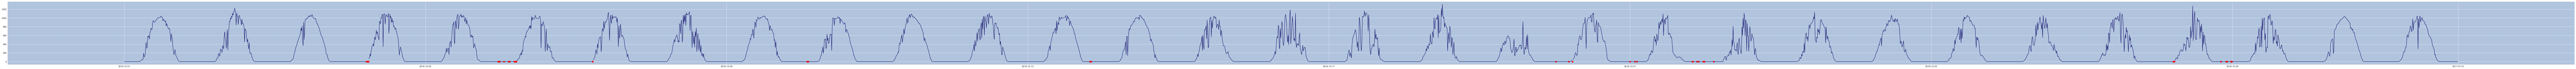

In [344]:
plt.scatter(x=df.loc[HrsFaltantes].index, y=np.zeros(len(HrsFaltantes)), marker='o', Color='Red')
plt.style.use('seaborn-whitegrid')
plt.grid(color='White', linestyle='--', linewidth=1)
plt.rcParams['axes.facecolor'] = 'lightsteelblue'
plt.gcf().set_size_inches(200, 5)
plt.plot(df['SolarRad'], Color='midnightblue')

In [345]:
df.SolarRad.max()

1311.0

In [346]:
len(HrsFaltantes)

43

In [347]:
df.loc[(df.index>='2014-01-30'),['Rain','TempOut','SolarRad']].head(144)

,Rain,TempOut,SolarRad
2016-12-01 00:00:00,0.0,26200.0,0.0
2016-12-01 00:10:00,0.0,26200.0,0.0
2016-12-01 00:20:00,0.0,26200.0,0.0
2016-12-01 00:30:00,0.0,26200.0,0.0
2016-12-01 00:40:00,0.0,26200.0,0.0
2016-12-01 00:50:00,0.0,26300.0,0.0
2016-12-01 01:00:00,0.0,26300.0,0.0
2016-12-01 01:10:00,0.0,26300.0,0.0
2016-12-01 01:20:00,0.0,26400.0,0.0
2016-12-01 01:30:00,0.0,26300.0,0.0


In [348]:
df.to_excel(r'C:\Users\Katia Suely\Desktop\Planilhas do programa\2016dez.xlsx')